In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
X=pd.read_csv('weatherHistory.csv')

In [4]:
X.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<Axes: >

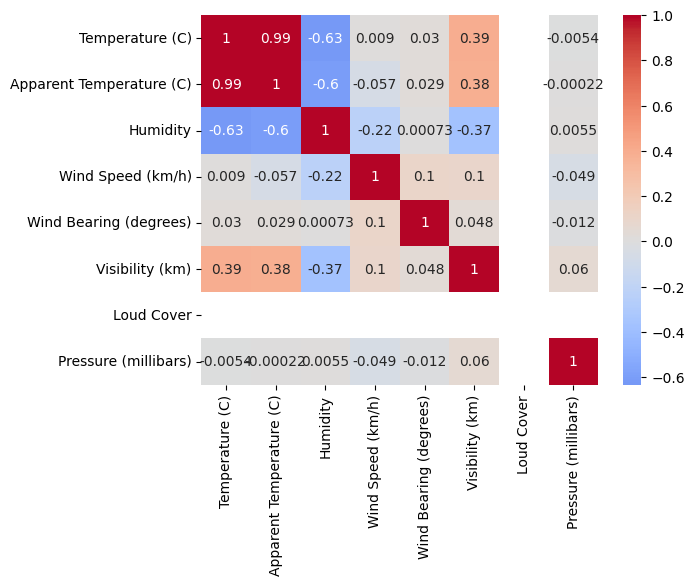

In [5]:
sns.heatmap(X.corr(numeric_only=True),cmap='coolwarm',center=0,annot=True)

In [6]:
y=X['Temperature (C)']
X=X[['Humidity', 'Visibility (km)']]

<Axes: xlabel='Humidity', ylabel='Temperature (C)'>

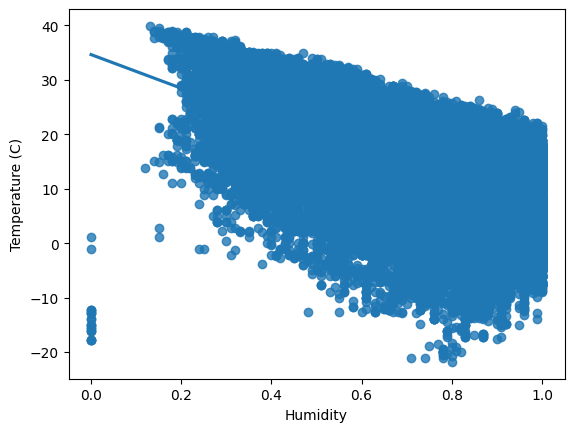

In [7]:
sns.regplot(x='Humidity',y=y, data=X)

<Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>

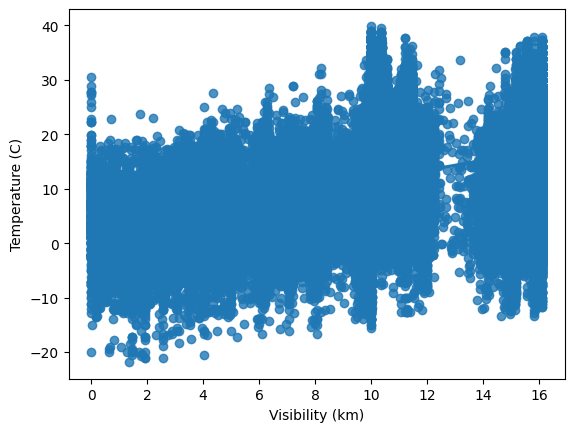

In [8]:
sns.regplot(x='Visibility (km)',y=y, data=X)

In [9]:
X

,Humidity,Visibility (km)
0,0.89,15.8263
1,0.86,15.8263
2,0.89,14.9569
3,0.83,15.8263
4,0.83,15.8263
...,...,...
96448,0.43,16.1000
96449,0.48,15.5526
96450,0.56,16.1000
96451,0.60,16.1000


In [10]:
import sklearn.model_selection
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2,shuffle=True)

In [11]:
X_train

,Humidity,Visibility (km)
75391,0.37,15.0213
41381,0.83,9.9820
40474,0.34,10.3523
70968,0.71,16.1000
17585,0.55,11.3988
...,...,...
50695,0.93,1.2719
62374,0.50,16.1000
75246,0.80,7.9051
17294,0.65,11.4471


In [12]:
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [13]:
X.corr()

,Humidity,Visibility (km)
Humidity,1.000000,-0.369173
Visibility (km),-0.369173,1.000000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Humidity         96453 non-null  float64
 1   Visibility (km)  96453 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


In [15]:
X.describe()

,Humidity,Visibility (km)
count,96453.000000,96453.000000
mean,0.734899,10.347325
std,0.195473,4.192123
min,0.000000,0.000000
25%,0.600000,8.339800
50%,0.780000,10.046400
75%,0.890000,14.812000
max,1.000000,16.100000


In [16]:
y

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn import tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

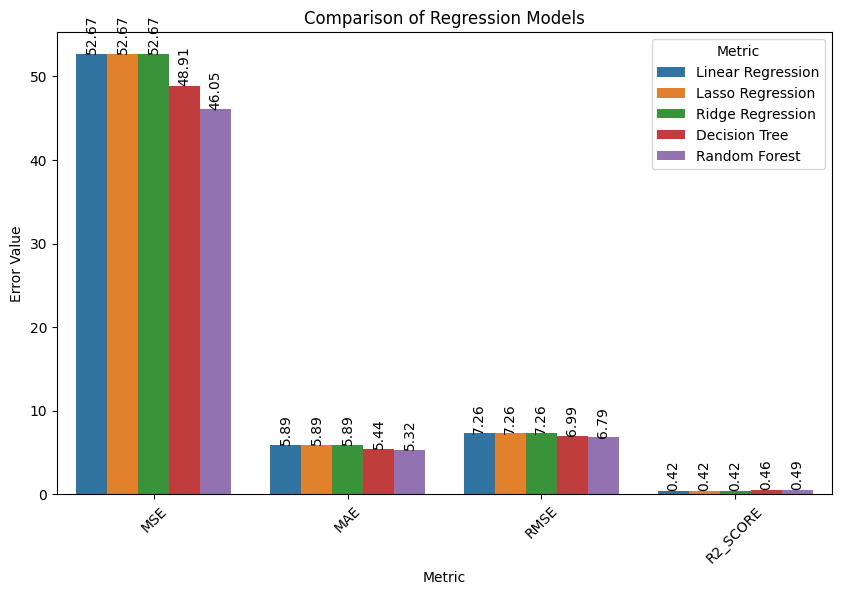

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.02),
    'Ridge Regression': Ridge(alpha=10.0),
    'Decision Tree': tree.DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store the performance metrics
metrics = {
    'Model': [],
    'MSE': [],
    'MAE': [],
    'RMSE':[],
    'R2_SCORE':[]
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r_squared=r2_score(y_test, y_pred)
    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['MAE'].append(mae)
    metrics['RMSE'].append(rmse)
    metrics['R2_SCORE'].append(r_squared)
    

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame for easy plotting with Seaborn
metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['MSE', 'MAE','RMSE','R2_SCORE'], var_name='Metric', value_name='Value')

# Plot the metrics using Seaborn
plt.figure(figsize=(10, 6))
bars=sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model')
for container in bars.containers:
    plt.bar_label(container,fmt='%.2f', label_type='edge',rotation=90)
plt.title('Comparison of Regression Models')
plt.ylabel('Error Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

In [19]:
X_simp=pd.DataFrame(X['Humidity'])

In [20]:
X_train_simp,X_test_simp,y_train_simp,y_test_simp=sklearn.model_selection.train_test_split(X_simp,y,test_size=0.2,shuffle=True)

In [21]:

linear_reg_simp = LinearRegression()
linear_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_linear_simp = linear_reg_simp.predict(X_test_simp)
mse_linear_simp = mean_squared_error(y_test, y_pred_linear_simp)
print(f"Linear Regression Mean Squared Error: {mse_linear_simp}")


lasso_reg_simp = Lasso(alpha=0.02)
lasso_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_lasso_simp = lasso_reg_simp.predict(X_test_simp)
mse_lasso_simp = mean_squared_error(y_test, y_pred_lasso_simp)
print(f"Lasso Regression Mean Squared Error: {mse_lasso_simp}")


ridge_reg_simp = Ridge(alpha=10.0)  
ridge_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_ridge_simp = ridge_reg_simp.predict(X_test_simp)
mse_ridge_simp = mean_squared_error(y_test, y_pred_ridge_simp)
print(f"Ridge Regression Mean Squared Error: {mse_ridge_simp}")


dtree_reg_simp = tree.DecisionTreeRegressor()
dtree_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_dtree_simp = dtree_reg_simp.predict(X_test_simp)
mse_dtree_simp = mean_squared_error(y_test, y_pred_dtree_simp)
print(f"Decision Tree Regression Mean Squared Error: {mse_dtree_simp}")

rf_reg_simp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg_simp.fit(X_train_simp, y_train_simp)
y_pred_rf_simp = rf_reg_simp.predict(X_test_simp)
mse_rf_simp = mean_squared_error(y_test, y_pred_rf_simp)
print(f"Random Forest Regression Mean Squared Error: {mse_rf_simp}")

# SVM Regression 
# svm_reg_simp = SVR()
# svm_reg_simp.fit(X_train, y_train)
# y_pred_svm_simp = svm_reg_simp.predict(X_test)
# mse_svm_simp = mean_squared_error(y_test, y_pred_svm_simp)
# print(f"SVM Regression Mean Squared Error: {mse_svm_simp}")

Linear Regression Mean Squared Error: 127.32463560638202
Lasso Regression Mean Squared Error: 126.10214840617891
Ridge Regression Mean Squared Error: 127.07882220313546
Decision Tree Regression Mean Squared Error: 131.80490205094537
Random Forest Regression Mean Squared Error: 131.79503019984372
